# Import Modules

## Notebook Settings

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

## Python Packages

In [2]:
import sys
import os
print(os.getcwd())

sys.path.insert(
    0,
    os.path.join(
        os.environ["PROJ_irox"],
        "data"))
from proj_data_irox import proj_dir_name, irox_bulk_color_map

# #############################################################################
import copy

import pickle

import chart_studio.plotly as py
import plotly.graph_objs as go

import plotly.offline as py_off
from plotly.offline import (
    init_notebook_mode,
    iplot,
    )

# #############################################################################
from methods import (
    create_pourbaix_plot,
    create_outside_borders,
    create_pourb_entry_outline,
    create_oer_equil_line,
    )

init_notebook_mode(connected=True)


# #############################################################################
from plotting.my_plotly import (
    add_minor_ticks,
    my_plotly_plot,
    add_duplicate_axes)

/mnt/f/Dropbox/01_norskov/00_git_repos/PROJ_IrOx_Active_Learning_OER/workflow/07_bulk_pourbaix/01_pourbaix_scripts


# Script Inputs

In [3]:
run_create_entries_script = True

axis_ranges = {
        "x_axis": [0., 14],
        "y_axis": [0., 2.5],

        # "x_axis": [-0.0001, 0.0001],
        # "y_axis": [1.4920084, 1.4923185],
        }

entries_to_remove_list = [
    # "IrO3_TEMP00",
    # "IrO3_TEMP01",
    # "IrO3_TEMP02",
    # "IrO3_TEMP03",
    # "IrO3_TEMP04",
    # "IrO3_TEMP05",
    # "IrO3_TEMP06",
    # "IrO3_TEMP07",
    # "IrO3_TEMP08",
    # "IrO3_TEMP09",
    # "IrO3_TEMP10",
    # "IrO3_TEMP11",
    # "IrO3_TEMP12",
    # "IrO3_TEMP13",
    # "IrO3_TEMP14",
    # "IrO3_TEMP15",
    # "IrO3_TEMP16",
    # "IrO3_TEMP17",
    # "IrO3_TEMP18",
    # "IrO3_TEMP19",
    # "IrO3_TEMP20",
    # "IrO3_TEMP21",


    "IrO3_rutile-like",
    "IrO3_battery",

    # "IrO3_a-AlF3",
    ]

# Load Entry Data

In [4]:
# %%capture

if run_create_entries_script:
    !python sc_create_all_entries.py

{'Major_Elements': ['Ir'], 'Name': 'IrO4[-] ', 'Energy': -2.038081775, 'Reference solid energy': -1.214176376, 'Reference Solid': 'IrO2', 'Source': 'Douglas G. Brookins, Eh-pH Diagrams for Geochemistry, Springer-Verlag Berlin Heidelberg 2059'}

IrO4[-]  Ir1 O4 -1 -2.038081775
IrO4[-]  Ir1 O4 -1 -2.038081775


## All Pourbaix entries

In [5]:
# #############################################################################
path_i = os.path.join(
    "out_data",
    "all_entries.pickle")
with open(path_i, "rb") as fle:
    all_entries = pickle.load(fle)
# #############################################################################

In [6]:
all_entries

[Pourbaix Entry : Ir1 with energy = 0.0000, npH = 0, nPhi = 0.0, nH2O = 0, entry_id = None ,
 Pourbaix Entry : Ir1 O2 with energy = 2.9641, npH = -4.0, nPhi = -4.0, nH2O = 2.0, entry_id = None ,
 Pourbaix Entry : Ir1 O3 with energy = 5.5611, npH = -6.0, nPhi = -6.0, nH2O = 3.0, entry_id = None ,
 Pourbaix Entry : Ir1 O3 with energy = 5.6127, npH = -6.0, nPhi = -6.0, nH2O = 3.0, entry_id = None ,
 Pourbaix Entry : Ir1 O3 with energy = 5.7766, npH = -6.0, nPhi = -6.0, nH2O = 3.0, entry_id = None ,
 Pourbaix Entry : Ir1 O3 with energy = 5.9489, npH = -6.0, nPhi = -6.0, nH2O = 3.0, entry_id = None ,
 Pourbaix Entry : Ir1 O4 with energy = 7.4405, npH = -8.0, nPhi = -7.0, nH2O = 4.0, entry_id = None ]

In [7]:
# assert False

## Bulk Pourbaix transitions

In [8]:
# path_i = os.path.join(
#     os.environ["PROJ_irox"],
#     "workflow/07_bulk_pourbaix/01_pourbaix_scripts",
#     "out_data/bulk_pourb_transitions.pickle")
# with open(path_i, "rb") as fle:
#     pourb_trans = pickle.load(fle)

# pourb_trans

# Process Data for Plotting

In [9]:
all_entries

[Pourbaix Entry : Ir1 with energy = 0.0000, npH = 0, nPhi = 0.0, nH2O = 0, entry_id = None ,
 Pourbaix Entry : Ir1 O2 with energy = 2.9641, npH = -4.0, nPhi = -4.0, nH2O = 2.0, entry_id = None ,
 Pourbaix Entry : Ir1 O3 with energy = 5.5611, npH = -6.0, nPhi = -6.0, nH2O = 3.0, entry_id = None ,
 Pourbaix Entry : Ir1 O3 with energy = 5.6127, npH = -6.0, nPhi = -6.0, nH2O = 3.0, entry_id = None ,
 Pourbaix Entry : Ir1 O3 with energy = 5.7766, npH = -6.0, nPhi = -6.0, nH2O = 3.0, entry_id = None ,
 Pourbaix Entry : Ir1 O3 with energy = 5.9489, npH = -6.0, nPhi = -6.0, nH2O = 3.0, entry_id = None ,
 Pourbaix Entry : Ir1 O4 with energy = 7.4405, npH = -8.0, nPhi = -7.0, nH2O = 4.0, entry_id = None ]

In [10]:
entries_to_remove_list

['IrO3_rutile-like', 'IrO3_battery']

In [11]:
%%capture

data_entry_borders = create_pourb_entry_outline(
    entries_to_remove_list=entries_to_remove_list,
    all_entries=all_entries)

data = create_pourbaix_plot(entries=all_entries, axis_ranges=axis_ranges)

oer_equil_line = create_oer_equil_line(axis_ranges=axis_ranges)

data += data_entry_borders
data += [oer_equil_line]

# Plotting

In [12]:
from layout import layout

fig = go.Figure(
    data=data,
    layout=layout,
    )


x_axis_range_tmp = [
    axis_ranges["x_axis"][0] + 0.03,
    axis_ranges["x_axis"][1] - 0.03,
    ]


y_axis_range_tmp = [
    axis_ranges["y_axis"][0] + 0.03,
    axis_ranges["y_axis"][1] - 0.03,
    ]

fig.layout.yaxis.range = y_axis_range_tmp
fig.layout.xaxis.range = x_axis_range_tmp

# fig.layout.yaxis.range = axis_ranges["y_axis"]
# fig.layout.xaxis.range = axis_ranges["x_axis"]

In [13]:
# len(layout.annotations)

annotations_new = []
for annot_i in layout.annotations:
    # print(annot_i)
    
    if "<sub>3<" in annot_i.text:
        # print(annot_i)
        
        annotations_new.append(annot_i)

    print("")

In [14]:
%%capture

fig.layout.update(annotations=annotations_new)

# Adding 2nd x-axis for minor ticks

In [15]:
shared_dupl_axis = dict(
    tickcolor="black",
    ticklen=3)

ticks_props_new_x = go.layout.XAxis(
    tick0=0,
    **shared_dupl_axis)

ticks_props_new_y = go.layout.YAxis(
    dtick=0.25,
    **shared_dupl_axis)


add_duplicate_axes(
    fig, axis_type='x',
    axis_data=ticks_props_new_x.to_plotly_json())

add_duplicate_axes(
    fig, axis_type='y',
    axis_data=ticks_props_new_y.to_plotly_json())

Writing pdf with ORCA
prepath: out_plot/bulk_pourbaix
Couldn't write pdf


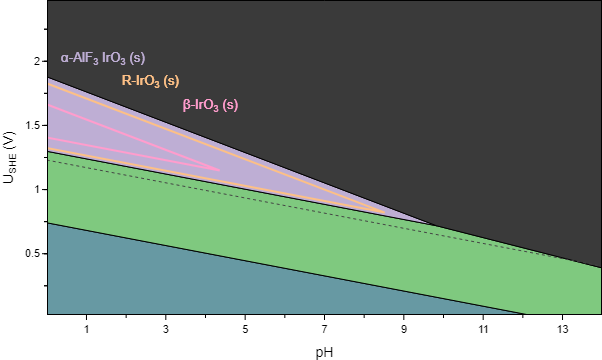

In [16]:
my_plotly_plot(
    figure=fig,
    # plot_name="bulk_pourbaix_wo_alpha",
    plot_name="bulk_pourbaix",
    write_html=True,
    write_png=False,
    png_scale=6.0,
    write_pdf=True,
    write_svg=False,
    try_orca_write=True,
    )

fig.show()

# Saving figure to pickle

In [17]:
# Pickling data ######################################################
directory = "out_data"
if not os.path.exists(directory): os.makedirs(directory)
with open(os.path.join(directory, "pourb_fig_0.pickle"), "wb") as fle:
    pickle.dump(fig, fle)
# #####################################################################